In [124]:
%run 'effLib.ipynb'


Loading Eff Lib


In [148]:
plcName = "proton"
f = root_open( "~/Desktop/P_2d.root" )
fd = root_open( "~/Desktop/tofEff_test.root" )

#### Reconstructed vs. Data
comparison of reconstructed MC tracks with the data after passing the analysys cuts  
* Event Cuts  
 * abs(Vertex_Z) < 30 [cm]  
 * abs(Vertex_R) < 1 [cm] from (0, -0.89)  
* Track Cuts  
 * dca < 1.0 [cm]
 * nHitsFit > 15
 * nHitsdEdx > 10
 * nHitsRatio > .52
 * 0.7 < ptRatio < 1.42
 * pt > 0.1

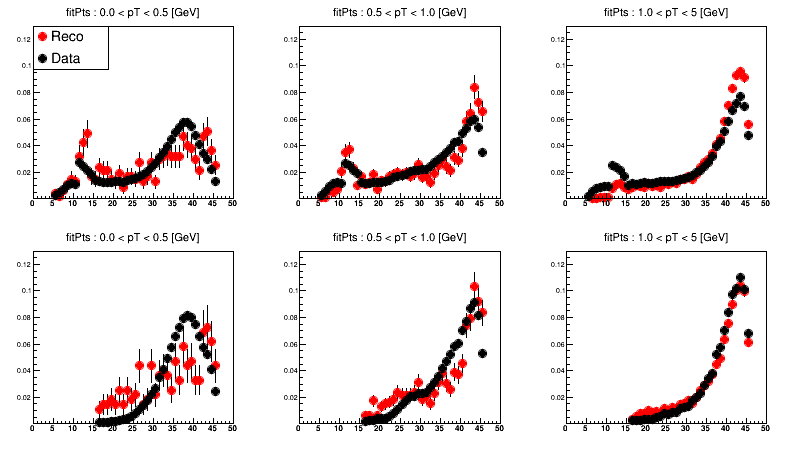

In [149]:

c = Canvas( width=800, height=450 )
c.Clear()
ROOT.gStyle.SetOptStat(0)
c.Divide( 3, 2 )

drawVsData( "", "fitPts", 1, ptLow=0.0, ptHigh=0.5, maxY=0.13)
drawVsData( "", "fitPts", 2, ptLow=0.5, ptHigh=1.0, maxY=0.13 )
drawVsData( "", "fitPts", 3, ptLow=1.0, ptHigh=5, maxY=0.13 )

drawVsData( "post_", "fitPts", 4, ptLow=0.0, ptHigh=0.5, maxY=0.13)
drawVsData( "post_", "fitPts", 5, ptLow=0.5, ptHigh=1.0, maxY=0.13 )
drawVsData( "post_", "fitPts", 6, ptLow=1.0, ptHigh=5, maxY=0.13 )
c.Print( plcName + "/fitPts.pdf" )
c


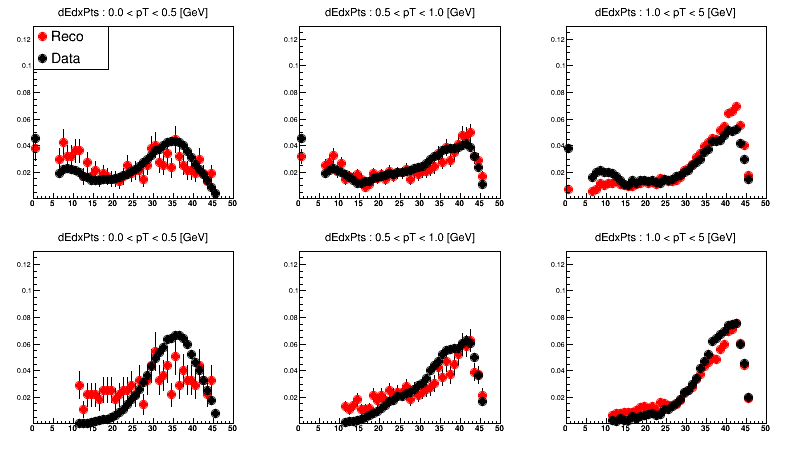

In [150]:
drawVsData( "", "dEdxPts", 1, ptLow=0.0, ptHigh=0.5, maxY=0.13)
drawVsData( "", "dEdxPts", 2, ptLow=0.5, ptHigh=1.0, maxY=0.13 )
drawVsData( "", "dEdxPts", 3, ptLow=1.0, ptHigh=5, maxY=0.13 )

drawVsData( "post_", "dEdxPts", 4, ptLow=0.0, ptHigh=0.5, maxY=0.13)
drawVsData( "post_", "dEdxPts", 5, ptLow=0.5, ptHigh=1.0, maxY=0.13 )
drawVsData( "post_", "dEdxPts", 6, ptLow=1.0, ptHigh=5, maxY=0.13 )
c.Print( plcName + "/dEdxPts.pdf" )
c

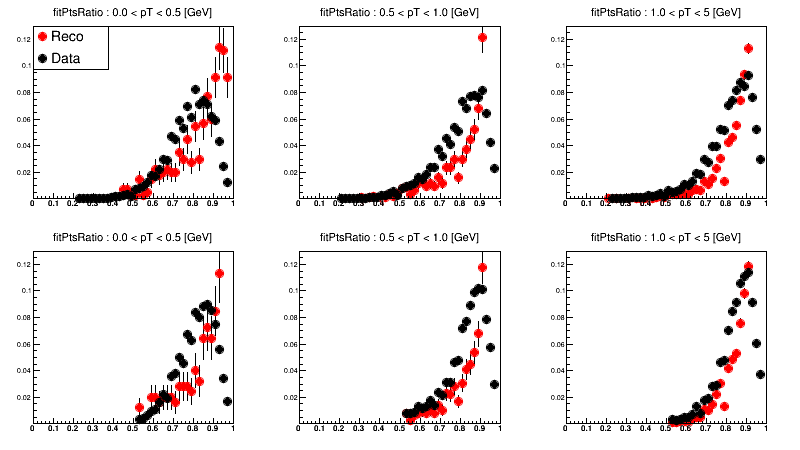

In [151]:
drawVsData( "", "fitPtsRatio", 1, ptLow=0.0, ptHigh=0.5, maxY=0.13)
drawVsData( "", "fitPtsRatio", 2, ptLow=0.5, ptHigh=1.0, maxY=0.13 )
drawVsData( "", "fitPtsRatio", 3, ptLow=1.0, ptHigh=5, maxY=0.13 )

drawVsData( "post_", "fitPtsRatio", 4, ptLow=0.0, ptHigh=0.5, maxY=0.13)
drawVsData( "post_", "fitPtsRatio", 5, ptLow=0.5, ptHigh=1.0, maxY=0.13 )
drawVsData( "post_", "fitPtsRatio", 6, ptLow=1.0, ptHigh=5, maxY=0.13 )
c.Print( plcName + "/fitPtsRatio.pdf" )
c

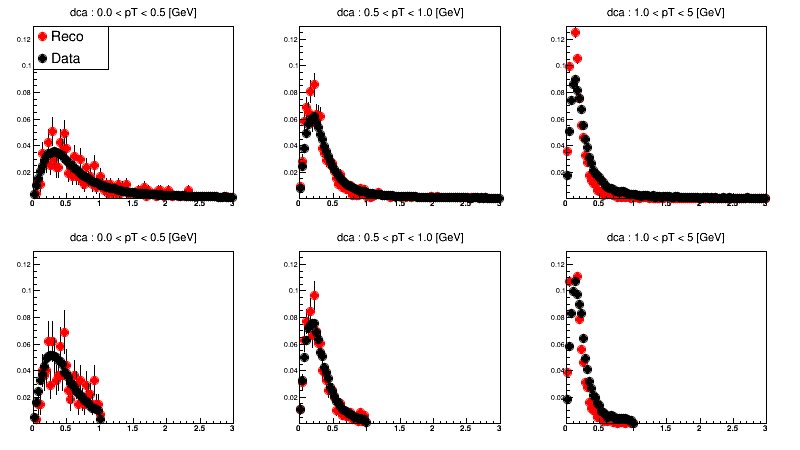

In [152]:
drawVsData( "", "dca", 1, ptLow=0.0, ptHigh=0.5, maxY=0.13)
drawVsData( "", "dca", 2, ptLow=0.5, ptHigh=1.0, maxY=0.13 )
drawVsData( "", "dca", 3, ptLow=1.0, ptHigh=5, maxY=0.13 )

drawVsData( "post_", "dca", 4, ptLow=0.0, ptHigh=0.5, maxY=0.13)
drawVsData( "post_", "dca", 5, ptLow=0.5, ptHigh=1.0, maxY=0.13 )
drawVsData( "post_", "dca", 6, ptLow=1.0, ptHigh=5, maxY=0.13 )
c.Print( plcName + "/dca.pdf" )
c

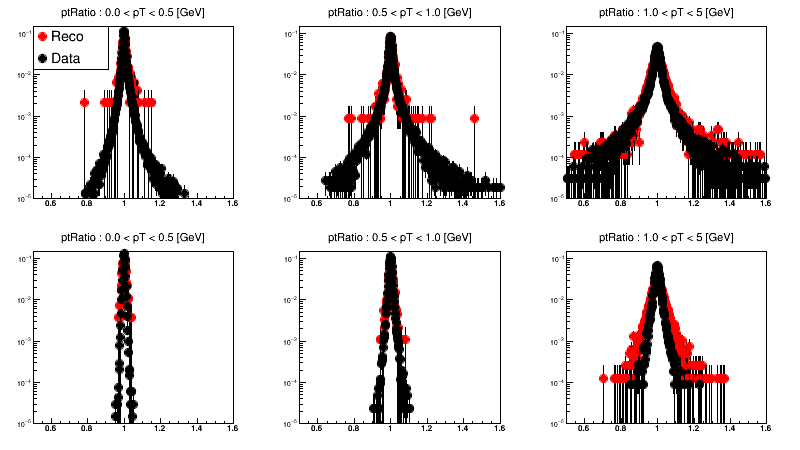

In [153]:
drawVsData( "", "ptRatio", 1, ptLow=0.0, ptHigh=0.5, maxY=0.15, logY=1)
drawVsData( "", "ptRatio", 2, ptLow=0.5, ptHigh=1.0, maxY=0.15, logY=1 )
drawVsData( "", "ptRatio", 3, ptLow=1.0, ptHigh=5, maxY=0.15, logY=1 )

drawVsData( "post_", "ptRatio", 4, ptLow=0.0, ptHigh=0.5, maxY=0.15, logY=1)
drawVsData( "post_", "ptRatio", 5, ptLow=0.5, ptHigh=1.0, maxY=0.15, logY=1 )
drawVsData( "post_", "ptRatio", 6, ptLow=1.0, ptHigh=5, maxY=0.15, logY=1 )
c.Print( plcName + "/ptRatio.pdf" )
c

####Energy Loss and Momentum Resolution

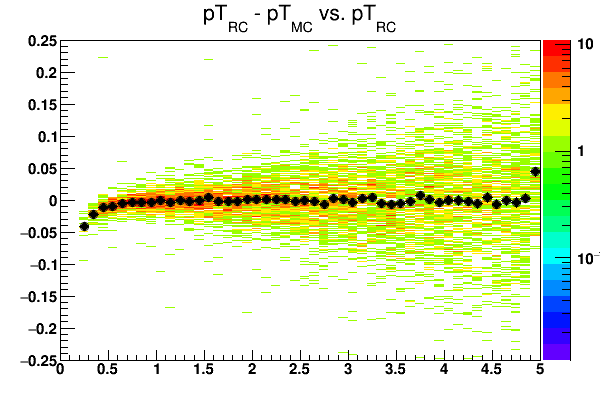

In [154]:
c2 = Canvas(  width=600, height=400 )
c2.Clear()
hel = f.energyLoss;
hel.Draw("colz")
ROOT.gPad.SetLogz(1)
hel.ProfileX().Draw("same")
c2

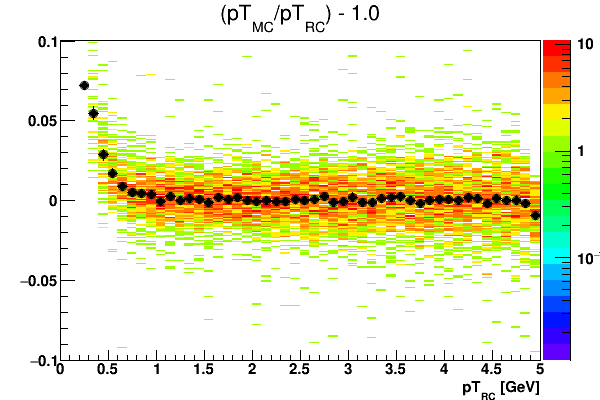

In [155]:
c2.Clear()
hpr = f.ptRes
hpr.Draw("colz")
hpr.GetYaxis().SetRangeUser(-.1, .1)
hpr.ProfileX().Draw("same")
c2

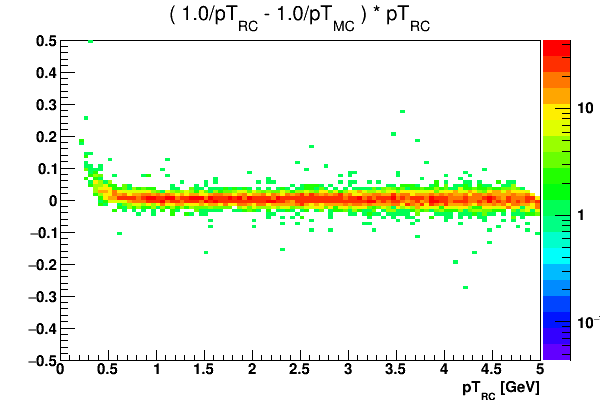

In [156]:
c2.Clear()
hpr2 = f.ptRes2
hpr2
hpr2.Draw("colz")
c2

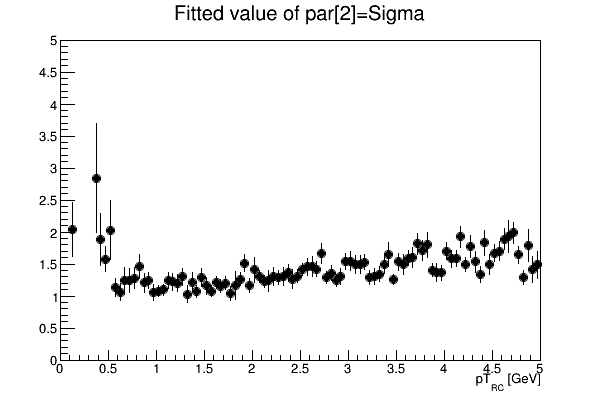

In [157]:
nrex = ROOT.TObjArray()
hpr2.FitSlicesY( 0, 0, -1, 0, "QNR", nrex)

nrex[2].Scale(100) # put in percent
nrex[2].GetYaxis().SetRangeUser(0, 0.1)
nrex[2].Draw("")

nrex[2].GetYaxis().SetRangeUser( 0, 5)
#hpr.ProfileX().Draw("same")
c2

ec : 
p0 =  0.833230832405
p1 =  0.294731300266
p2 =  10.9511362434


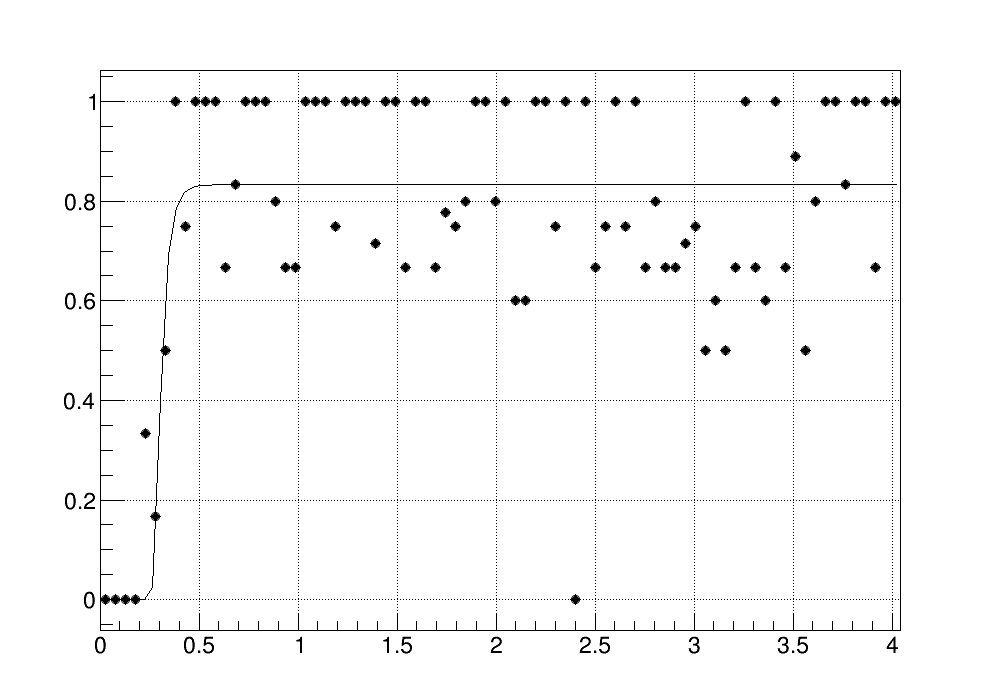

In [158]:
c2 = Canvas(  width=1000, height=700 )
hC = PlotEff( 240, 500, -0.25, 0.25, "ec")
hC.GetXaxis().SetRangeUser( 0.0, 4 )
#hC.Draw("pe")
ROOT.gPad.SetGrid(1, 1)
c2


ec : 
p0 =  0.836407889212
p1 =  0.329618101627
p2 =  5.91870822545
ep : 
p0 =  0.879691582152
p1 =  0.335033034461
p2 =  7.04818198704


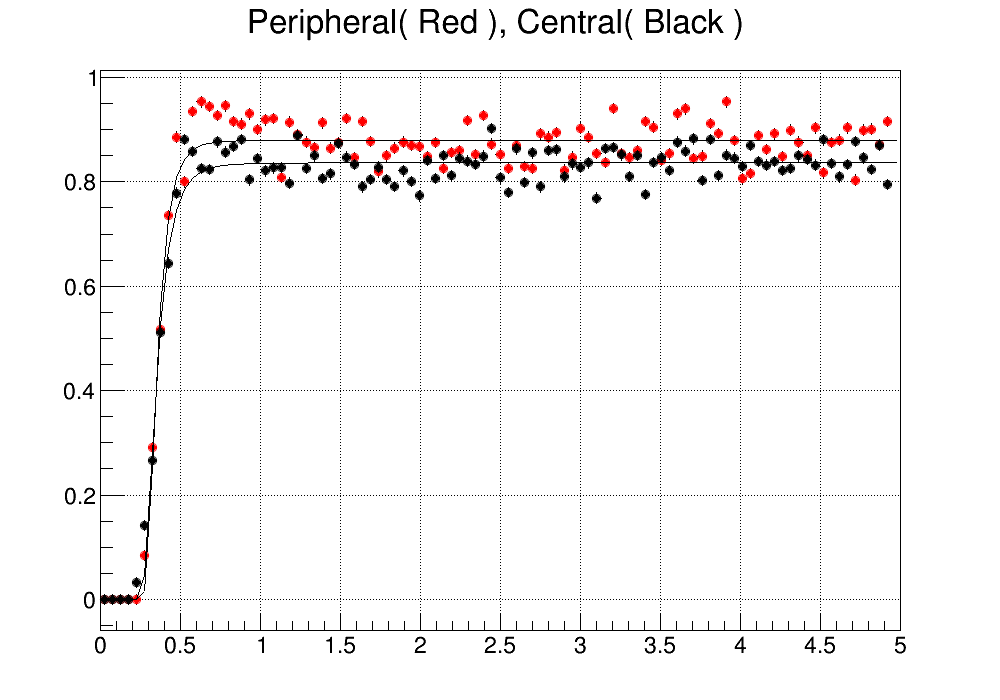

In [12]:
hC = PlotEff( 240, 500, -0.25, 0.25, "ec")
hP = PlotEff( 1, 40, -0.25, 0.25, "ep")

hP.SetMarkerColor( 2 )
hP.Draw()
hP.SetTitle( "Peripheral( Red ), Central( Black ) " )
hC.Draw("same")
c2



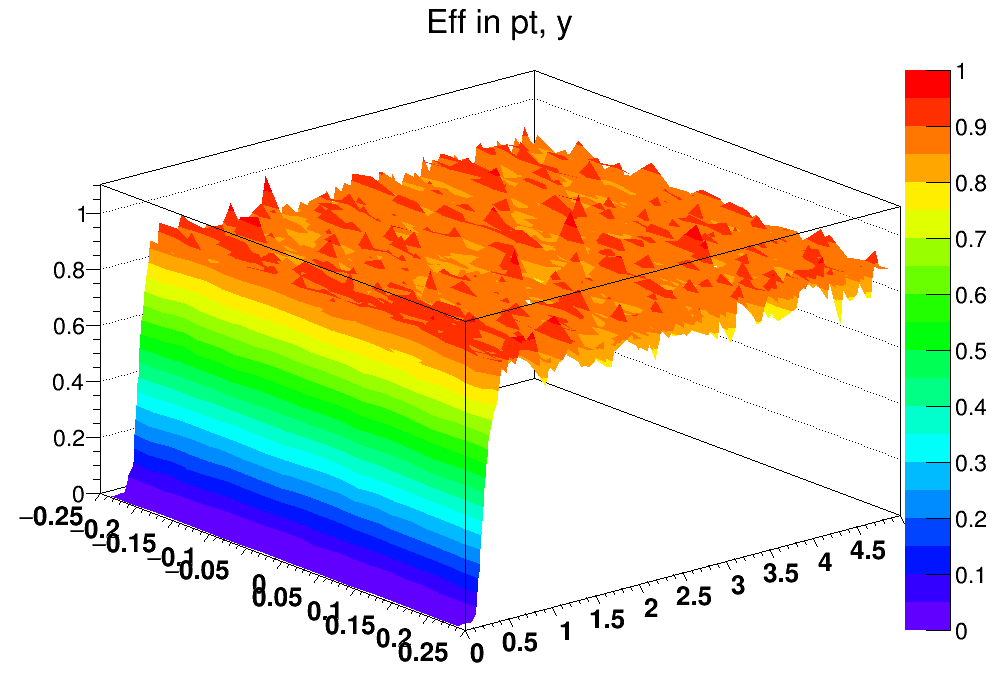

In [16]:
c2.Clear()
h2D = Plot2DEff( 1, 500, "dan" )
h2D.Draw( "surf2z" )
h2D.SetTitle( "Eff in pt, y" )
theta = 30;
phi = -50;
ROOT.gPad.SetTheta(theta); 
ROOT.gPad.SetPhi(phi); 
ROOT.gPad.Update();
c2

